<a href="https://colab.research.google.com/github/Bigyajeet/FacedetectionSystemusingDeeplearning/blob/main/facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
with open('/content/images.p','rb') as f:
    images=pickle.load(f)

with open("/content/labels.p",'rb') as f:
  labels=pickle.load(f)


In [2]:
print(images.shape)
print(labels.shape)


(200, 100, 100)
(200,)


In [3]:
set(labels)

{np.str_('bigyajeet'), np.str_('biswojeet')}

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=le.fit_transform(labels)

In [5]:
set(labels)

{np.int64(0), np.int64(1)}

In [6]:
import numpy as np
n_persons=len(set(labels))
print("Number of persons:",n_persons)
label_mapping=le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i, "-->", label_mapping[i])

Number of persons: 2
0 --> bigyajeet
1 --> biswojeet


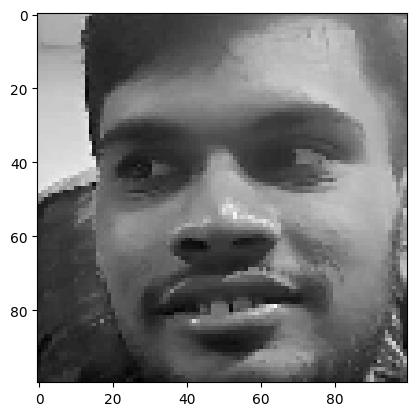

In [7]:
import matplotlib.pyplot as plt

plt.imshow(images[198], cmap='gray')
plt.show()

In [8]:
import cv2
def preprocessing(img):
  img=cv2.equalizeHist(img)
  img=img.reshape(100,100,1)
  img=img/255
  return img


In [9]:
images=np.array(list(map(preprocessing,images)))
print("Shapes of input:",images.shape)


Shapes of input: (200, 100, 100, 1)


In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
labels=to_categorical(labels)

In [12]:
categories=labels.shape[1]
print(categories)

2


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
#import convolution layer
from tensorflow.keras.layers import Conv2D
#import maxpooling layer
from tensorflow.keras.layers import MaxPooling2D
#import flatten layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop

In [14]:
model=Sequential()
model.add(Conv2D(64,(5,5),activation='relu',input_shape=(100,100,1)))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.compile(RMSprop(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 92, 92, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 44, 44, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 42, 42, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14112)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     7,225,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,358,722 (28.07 MB)

 Trainable params: 7,358,722 (28.07 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
h=model.fit(images,labels,validation_split=0.2,batch_size=50,epochs=10,verbose=1)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6198 - loss: 0.6456 - val_accuracy: 0.0000e+00 - val_loss: 1.2955
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5410 - loss: 0.6402 - val_accuracy: 0.5750 - val_loss: 0.7418
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9022 - loss: 0.3918 - val_accuracy: 0.9000 - val_loss: 0.2729
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7622 - loss: 0.4594 - val_accuracy: 0.9000 - val_loss: 0.3831
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9725 - loss: 0.1981 - val_accuracy: 0.5750 - val_loss: 0.8644
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8648 - loss: 0.3011 - val_accuracy: 0.7250 - val_loss: 0.5436
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9565 - loss: 0.1797 - val_accuracy: 0.9500 - val_loss: 0.1165
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9452 - loss: 0.1978 - val_accuracy: 0.9000 - val_loss: 0.20

In [17]:
from google.colab import files
upload=files.upload()

Saving biswojeet_12.jpg to biswojeet_12.jpg


In [18]:
d=list(upload.keys())[0]
print(d)

biswojeet_12.jpg


[255 216 255 ... 127 255 217]


/tmp/ipython-input-19-2877720438.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


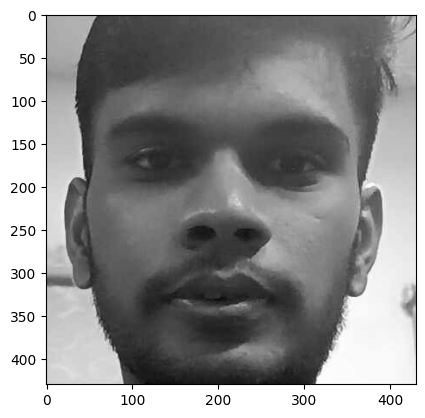

In [19]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [20]:
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)


In [21]:
img=img.reshape(1,100,100,1)
print(model.predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
[[0.10371534 0.8962847 ]]


In [22]:
prediction=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [23]:
p=np.argmax(prediction,axis=1)
print(p)

[1]


In [24]:
model.save('final_model.h5')